# Introduction to  Scikit-learn (sklearn)

This noteboom demonstrates some of the most useful functions of the beautiful  Scikit-learn  library.

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimaator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data 
4. Evaluating a model 
5. Improve a model
6. Save and load a trained model
7. Putting it all together

In [1]:
# Some standerd library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0. An end-to-end Scikit-Learn workflow




In [2]:
# 1.Getting the data ready


heart_disease = pd.read_csv('./data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create x (feature matrix)
X = heart_disease.drop("target",axis=1)

# Create y (labels)
y = heart_disease['target']


In [4]:
# 2.Choose the right model and hyperparameters

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

# we'll keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3.Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [6]:
clf.fit(X_train,y_train);

In [7]:
# y_preds = clf.predict(np.array([0,2,4,6,8])) #error because tha dimantion is difference

In [8]:
# Make a prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [9]:
y_test

178    0
272    0
153    1
52     1
203    0
      ..
222    0
157    1
206    0
147    1
80     1
Name: target, Length: 61, dtype: int64

In [10]:
# 4.Evaluate the model on training data and test data
clf.score(X_train,y_train)


1.0

In [11]:
clf.score(X_test,y_test)

0.7049180327868853

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.78      0.58      0.67        31
           1       0.66      0.83      0.74        30

    accuracy                           0.70        61
   macro avg       0.72      0.71      0.70        61
weighted avg       0.72      0.70      0.70        61



In [13]:
confusion_matrix(y_test,y_preds)

array([[18, 13],
       [ 5, 25]], dtype=int64)

In [14]:
accuracy_score(y_test,y_preds)

0.7049180327868853

In [15]:
# 5.Improve a model
# Try different amount of n_estimators
np.random.seed(50)

for i in range(10,100,10):
    print(f"Traning model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,y_test)*100:.2f}%")
    print("")

Traning model with 10 estimators...
Model accuracy on test set: 75.41%

Traning model with 20 estimators...
Model accuracy on test set: 75.41%

Traning model with 30 estimators...
Model accuracy on test set: 72.13%

Traning model with 40 estimators...
Model accuracy on test set: 77.05%

Traning model with 50 estimators...
Model accuracy on test set: 72.13%

Traning model with 60 estimators...
Model accuracy on test set: 73.77%

Traning model with 70 estimators...
Model accuracy on test set: 70.49%

Traning model with 80 estimators...
Model accuracy on test set: 73.77%

Traning model with 90 estimators...
Model accuracy on test set: 73.77%



In [16]:
# 6.Save the model and load it

import pickle

pickle.dump(clf,open("random_forst_model_1.pkl","wb"))



In [17]:
loaded_model = pickle.load(open("random_forst_model_1.pkl","rb"))
loaded_model.score(X_test,y_test)

0.7377049180327869

## 1.Getting our data ready to be used with machine learning

Three main things we have to do:
    
    1. Split the data into features and labels (usually `x` & `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values (also called fearure encoding )

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X = heart_disease.drop('target',axis=1)

In [20]:
y = heart_disease['target']

In [21]:
# Spilt the data into train and test sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

## 1.1 Make sure it's all numarical 

In [22]:
car_sales = pd.read_csv("./data/car-sale.csv")
car_sales

,Unnamed: 0,Make,Colour,Odometer (KM),Doors,Price
0,0,Honda,White,35431.0,4.0,15323.0
1,1,BMW,Blue,192714.0,5.0,19943.0
2,2,Honda,White,84714.0,4.0,28343.0
3,3,Toyota,White,154365.0,4.0,13434.0
4,4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...,...
768,994,BMW,Blue,163322.0,3.0,31666.0
769,995,Toyota,Black,35820.0,4.0,32042.0
770,997,Nissan,Blue,66604.0,4.0,31570.0
771,998,Honda,White,215883.0,4.0,4001.0


In [23]:
car_sales

,Unnamed: 0,Make,Colour,Odometer (KM),Doors,Price
0,0,Honda,White,35431.0,4.0,15323.0
1,1,BMW,Blue,192714.0,5.0,19943.0
2,2,Honda,White,84714.0,4.0,28343.0
3,3,Toyota,White,154365.0,4.0,13434.0
4,4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...,...
768,994,BMW,Blue,163322.0,3.0,31666.0
769,995,Toyota,Black,35820.0,4.0,32042.0
770,997,Nissan,Blue,66604.0,4.0,31570.0
771,998,Honda,White,215883.0,4.0,4001.0


In [24]:
# Spil into x/y

X = car_sales.drop('Price',axis=1)
y = car_sales['Price']

# Split into training and testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [25]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(X_train,y_train)

# error because the data in x is not numaric so ,now we convert the data in numeric


In [26]:
X.head()

,Unnamed: 0,Make,Colour,Odometer (KM),Doors
0,0,Honda,White,35431.0,4.0
1,1,BMW,Blue,192714.0,5.0
2,2,Honda,White,84714.0,4.0
3,3,Toyota,White,154365.0,4.0
4,4,Nissan,Blue,181577.0,3.0


In [27]:
# Turn the catagories into Numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features,
                                 )],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        9.97000e+02, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.98000e+02, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.99000e+02, 2.48360e+05]])

In [28]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,994.0,163322.0
769,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,995.0,35820.0
770,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,997.0,66604.0
771,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,998.0,215883.0


In [29]:
# Let's refit the model
np.random.seed(40)

X_train,X_test,y_train,y_test = train_test_split(transformed_X,y,test_size=0.3)

In [30]:
model.fit(X_train,y_train);

In [31]:
model.score(X_test,y_test) #in this saction our main gole is to convert the data into numeric so don't docus on prediction persentage

0.18384820601144847

### 1.2 What if there were missing values?
1. Fill them with some value (also know as imputation)
2. Remove the samples with missing data altogether.


In [32]:
# import car sale missing data

car_sales_missing = pd.read_csv('./data/car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [33]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [34]:
# Create x/y
X = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [35]:
# Let's try and convert or data in numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features,
                                 )],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Option 1: Fill missing data with Pandas

In [36]:
# Fill the "Make" column
car_sales_missing['Make'].fillna('missing',inplace=True)

# Fill the "Colour" column
car_sales_missing['Colour'].fillna('missing',inplace=True)

# Fill the "Doors" column
car_sales_missing['Doors'].fillna(4,inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

In [37]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [38]:
# Remove rows with missing price value

car_sales_missing.dropna(inplace=True)

In [39]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [40]:
X = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [41]:
# Let's try and convert or data in numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features,
                                 )],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [42]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [43]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


## Option 2: Fill missing values with Scikit-Learn

In [44]:
car_sales_missing = pd.read_csv('./data/car-sales-extended-missing-data.csv')

In [45]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
# Drop the row with no labels

car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [47]:
# Split into X & Y

X = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [48]:
# Fill the missing value with Scikit-Learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numarical value with mean
cat_imputer = SimpleImputer(strategy = 'constant',fill_value= 'missing')
door_imputer = SimpleImputer(strategy = 'constant',fill_value= 4)
num_imputer = SimpleImputer(strategy = 'mean')

# Define columns

cat_features =['Make','Colour'] 
door_features =['Doors'] 
num_features =['Odometer (KM)'] 


# Create an imputer (Something that fills missing data)

imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])


# Transform the data

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [49]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [50]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [51]:

# Let's try and convert or data in numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features,
                                 )],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [52]:
# Now we've got our data as numbers and filled (no missing data)
# let's fit the model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(transformed_X,
                                                y,
                                                test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.21990196728583944

## 2.Choosing the right estimator/algorithm for our problem

Scikit-Learn uses estimator as another them for machine learning model or algorithm.

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

Stap 1 - Check the Scikit-Learn machine learning map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html  

### 2.1 Picking a machine learning model for a regression problem

In [53]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [54]:
boston_df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [56]:
# How many samples?
len(boston_df)

506

In [57]:
# Let's try Right Regression model

from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target',axis=1)
y = boston_df['target']

# Spilt into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate Ridge model

model = Ridge()
model.fit(X_train,y_train)

# Check the score of the Ridge model on test data
model.score(X_test,y_test)

0.6662221670168519

How do we improve this score?

What if Ridge wasn't working?

Let's refer back to this map...https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [58]:
# Let's try Random Forst Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)


# Create the data
X = boston_df.drop('target',axis=1)
y = boston_df['target']

# Spilt into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instatiate random forest regressor

clf = RandomForestRegressor()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8654448653350507

### 2.2 Choosing and estimator for a classification problame

Let's go to the map....https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [59]:
heart_disease = pd.read_csv("./data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Consulting the map and it says to try `LinearSVC`

In [60]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup the random seed
np.random.seed(42)

# Set the data

X = heart_disease.drop("target",axis=1)
y = heart_disease['target']

# Split the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate LinerSVC

clf = LinearSVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

C:\Users\PRUTHVI\Desktop\first\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [61]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup the random seed
np.random.seed(42)

# Set the data

X = heart_disease.drop("target",axis=1)
y = heart_disease['target']

# Split the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate LinerSVC

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8524590163934426

Tips:
    
    1. If you have structured data, used ensemble methods
    2. If you have unstuctured data, use deep learning or transfer learning

## 3.Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data 

Different names for:
* `X` = features, features variables, data
* `y` = labels, targets, target variables

In [62]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup the random seed
np.random.seed(42)

# Set the data

X = heart_disease.drop("target",axis=1)
y = heart_disease['target']

# Split the data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate LinerSVC
clf = RandomForestClassifier()

# Fit the model to the data(tranining the machine learning model)
clf.fit(X_train,y_train)

# Evaluate the Random Forest Classifier(use the patterns the model has learned)
clf.score(X_test,y_test)



0.8524590163934426

### 3.2 Making predictions using a machine learning model 

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [63]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [64]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [65]:
# Compare prediction to truth labels to evaluate the model

y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [66]:
clf.score(X_test,y_test)

0.8524590163934426

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make pridiction with `predict_proba`()


In [68]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [69]:
# Let's predict() on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`pridict()` can also be use for regression model

In [70]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create the data

X = boston_df.drop('target',axis=1)
y = boston_df['target']


# Split into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiante and fit model
model = RandomForestRegressor().fit(X_train,y_train)

# Make Predictions

y_preds = model.predict(X_test)

In [71]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [72]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [73]:
# Compare the prediction to the truth

from sklearn.metrics import median_absolute_error
median_absolute_error(y_test,y_preds)

1.6235000000000035

## 4.Evaluating a machine learning model

Three way to evaluate Scikit-Learn models/esitmators

1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions.

### 4.1 Evaluating a model with the score method

In [74]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train,y_train);

In [75]:
clf.score(X_test,y_test)

0.8524590163934426

In [76]:
clf.score(X_train,y_train)

1.0

Let's do the same but form regression...

In [77]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# create the data

X = boston_df.drop('target',axis=1)
y = boston_df['target']


# Split into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiante and fit model
model = RandomForestRegressor().fit(X_train,y_train)


In [78]:
model.score(X_test,y_test)

0.8654448653350507

### 4.2 Evaluating a model using the `scoring` parameter

 <img src = "./data/scoring.png"/>

In [79]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train,y_train);

In [80]:
clf.score(X_test,y_test)

0.8524590163934426

In [81]:
cross_val_score(clf,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [82]:
cross_val_score(clf,X,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [83]:
np.random.seed(42)

# Single training and test split score
clf_single=clf.score(X_test,y_test);

# take the mean of 5-fold cross-validation score

clf_cross_val_score = np.mean(cross_val_score(clf,X,y,cv=5))

# Compare the two
clf_single, clf_cross_val_score


(0.8524590163934426, 0.8248087431693989)

In [84]:
# Default scoring paramenter of classfier = mean accuracy

clf.score(X_test,y_test)

0.8524590163934426

In [85]:
# Scoring parameter set to None by default

cross_val_score(clf,X,y,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve 
3. Confusion matrix
4. Classification report


In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

clf_val_score = cross_val_score(clf,X,y,cv=5);

In [87]:
np.mean(clf_val_score)

0.8248087431693989

In [88]:
print(f"Heart Disease Classifire Accuracy:{np.mean(clf_val_score)*100:.2f}%")

Heart Disease Classifire Accuracy:82.48%



**Area under the receiver operating characteristic curve(AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curve are a comparison of a model's true positive rate (tpr) versus a models false positive rate(fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0 
* False negative = model predicts 0 when truth is 1

In [89]:
# create X_test..etc

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [90]:
from sklearn.metrics import roc_curve

# Fit the classifire

clf.fit(X_train,y_train)
# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [91]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [92]:
# create fpr,tpr and thresholds

fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

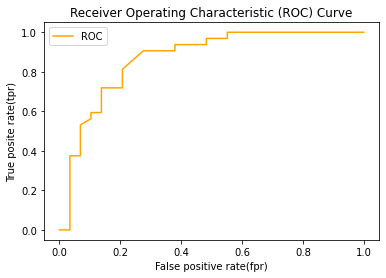

In [93]:
# Creare a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the flase positive rate(fpr)
    and true positive rate(tpr) of a model
    """
    
    # Plot toc curve
    plt.plot(fpr,tpr,color='orange',label="ROC")
    # Plot line with no predictive power (baseline)
#     plt.plot([0,1],[0,1],color='darkblue',linestyle="--",label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True posite rate(tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr);

In [94]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

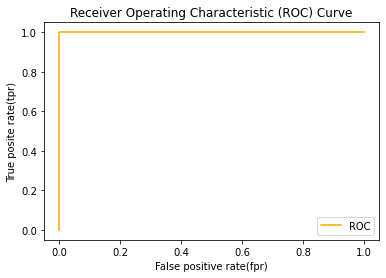

In [95]:
# Plot perfect ROC curve and AUC score

fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [96]:
# Perfect AUR score

roc_auc_score(y_test,y_test)

1.0

**Cunfusion Matrix**

A cunfusion matrix is a quick way to compare the label a model predicts and the actual labels it was supposed to predict.
In essence,giving you an idea of where the model is getting confussed

In [97]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [98]:
# Visualize cunfusion matrix with pd.crosstab()

pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [99]:
23+6+6+26

61

In [100]:
len(X_test)

61

In [101]:
# How install a conda package into the current envrionment from a Jupyter Notebook

import sys
# !conda install --yes --prefix {sys.prefix} seaborn

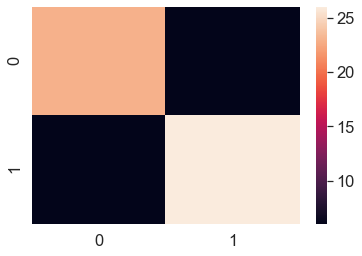

In [102]:
# Make our confusion matrix more visual with Seaborn's hearmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

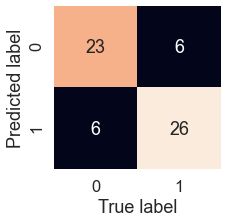

In [103]:
def plot_conf_mat(conf_mat):
    """
    Plot a confusion matrix using Seaborn's heatmap().
    """
    fig ,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True, # Annotate the boxes with conf_mat info
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label");
    
plot_conf_mat(conf_mat)

***Classification Report***

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [105]:
# Where predicsion and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # Only one positive case

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True,
                                    zero_division=False
                                  ))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
* ***Accuracy*** is a good measure to start with if all classes are balanced(e.g. same amount of samples which are labelled with 0 or 1)
* ***Precision*** and ***recall*** become mode important when classes are imbalanced.

* If false position predictions are worse than flase negatives, aim for higher precision

* ***F1-score*** is a combination of precision and recall

### 4.2.2 Regression model evaluation metrics

model evaluation matrics doc :- https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounces r-squared) ot coefficient of determination
2. Mean absolute error(MAE)
3. Mean squared error(MSE)

 <img src="./data/Regression model evaluation metrics.png"/>


**R^2**
What R-Squared does: Compares your models prediction to the mean of the targets.Values can range from nagative infinity(a vary poor model) to 1.For example,if all your model does is predict the mean of the targets,it's R^2 value would be 0.And if your model perdectly predicts a range of numbers it's R^2 calue would be 1.

In [106]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = boston_df.drop('target',axis=1)
y = boston_df['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

clf = RandomForestRegressor()
clf.fit(X_train,y_train);

In [107]:
clf.score(X_test,y_test)

0.8654448653350507

In [108]:
from sklearn.metrics import r2_score

# Fill an arrat with y_test mean

y_test_mean = np.full(len(y_test),y_test.mean())

In [109]:
y_test.mean()

21.488235294117644

In [110]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [111]:
# Model only predicting the mean gets an R^2 score of 0
r2_score(y_test,y_test_mean)

0.0

In [112]:
# Model predicting perdectly the correct values gets an R^2 score 1
r2_score(y_test,y_test)

1.0

***Mean absolue error(MAE)***

MAE is the average of the aboslute differences between predictions and actual balues.It gives you an idea of how wrong your models predictions are.

In [113]:
# Mean absolute error 
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

2.136382352941176

In [114]:
df = pd.DataFrame(data={"actual values":y_test,
                       "predicted values": y_preds})
df["difference"] = df['predicted values'] - df["actual values"]
df

,actual values,predicted values,difference
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


***Mean squared error(MSE)***

In [115]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
mse

9.867437068627442

In [116]:
# Calculate MSE by hand

squared = np.square(df['difference'])
squared
squared.mean()

9.867437068627442

### 4.2.3 Finally using the `scoring` parameter

In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [118]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [119]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is:82.48%


In [120]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
np.mean(cv_acc)

0.8248087431693989

In [121]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y,cv=5,scoring='precision')
np.mean(cv_precision)

0.8329547346025924

In [122]:
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y,cv=5,scoring='recall')
np.mean(cv_recall)

0.8545454545454545

In [123]:
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
np.mean(cv_f1)

0.8231854226519981

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = boston_df.drop('target',axis=1)
y = boston_df['target']

model = RandomForestRegressor()

In [125]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y,cv=5,scoring='r2')
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [126]:
# Mean absolute error

cv_mae = cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [127]:
# Mean squared error

cv_mae = cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mae)

-21.12863512415064

### 4.3 Using different evalution metrics as Scikit-Learn function

**Classification evaluation functions**

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Make some predictions

y_preds = clf.predict(X_test)

# Evaluate the classifier

print("Classifier metrics on the test set")
print(f"Accuracy:{accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision:{precision_score(y_test,y_preds)*100:.2f}%")
print(f"Recall:{recall_score(y_test,y_preds)*100:.2f}%")
print(f"F1:{f1_score(y_test,y_preds)*100:.2f}%")

Classifier metrics on the test set
Accuracy:85.25%
Precision:84.85%
Recall:87.50%
F1:86.15%


**Regression evaluation functions**

In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)

# Make some predictions

y_preds = model.predict(X_test)

# Evaluate the Regressoion

print("Regressoion metrics on the test set")
print(f"R^2:{r2_score(y_test,y_preds)*100:.2f}%")
print(f"MAE:{mean_absolute_error(y_test,y_preds)*100:.2f}%")
print(f"MSE:{mean_squared_error(y_test,y_preds)*100:.2f}%")

Regressoion metrics on the test set
R^2:51.06%
MAE:23.75%
MSE:12.20%


## 5. Improving a model

First predictions = baseline predictions.First model = baseline model.

From a data prespective:
* Could we collect more data?(generally,the more data ,the better)
* Could we improve our data?

From a model prespective:
* In there a better model we could use?
* Could we improve the current model?

Hyperparameters vs.Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to(potentially) improve its ability to find patterns 

Three wats to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [130]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### We're going to try and adjust:
* `max_depth`
* `max_features`
* `min_sample_leaf`
* `min_sample_split`
* `n_estimators`

In [131]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels on a classification
    """
    
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"accuracy":round(accuracy,2),
                   "precision":round(precision,2),
                   "recall":round(recall,2),
                   "f1":round(f1,2)}
    
    print(f"Acc:{accuracy * 100:.2f}%")
    print(f"Precision:{precision * 100:.2f}%")
    print(f"Recall:{recall:.2f}")
    print(f"F1 score:{f1:.2f}")
    return metric_dict

In [132]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X=heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

# Split the data into train,validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) #70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15% of data
X_train,y_train = X[:train_split],y[:train_split]
X_valid,y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test,y_test = X[valid_split:],y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)
# len(X_train), len(X_valid),len(X_test)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics;

Acc:82.22%
Precision:81.48%
Recall:0.88
F1 score:0.85


In [133]:
np.random.seed(42)

# Create a secound classifier with different hyperparameters
clf_2 = RandomForestClassifier(max_depth=10)
clf_2.fit(X_train,y_train)

# Make baseline predictions
y_preds = clf_2.predict(X_valid)
# len(X_train), len(X_valid),len(X_test)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics;

Acc:80.00%
Precision:80.77%
Recall:0.84
F1 score:0.82


## 5.2 Hyperparameter tuning with RandomizedSearchCV

In [134]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000,1200],
       'max_depth':[None,5,10,20,30],
       'max_features':['auto','sqrt'],
       'min_samples_split':[2,4,6],
       'min_samples_leaf':[1,2,4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)


# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions = grid,
                           n_iter = 10, # number of models to try
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of clf

rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [135]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [136]:
# Make predictions with best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions

rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc:81.97%
Precision:77.42%
Recall:0.86
F1 score:0.81


In [140]:
from sklearn.model_selection import GridSearchCV,train_test_split

grid_2 = {"n_estimators":[100,200,500],
       'max_depth':[None],
       'max_features':['auto','sqrt'],
       'min_samples_split':[6],
       'min_samples_leaf':[1,2]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)


# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid = grid_2,
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of clf

gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [141]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [142]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Acc:78.69%
Precision:74.19%
Recall:0.82
F1 score:0.78


Let's compare our different models metrics.

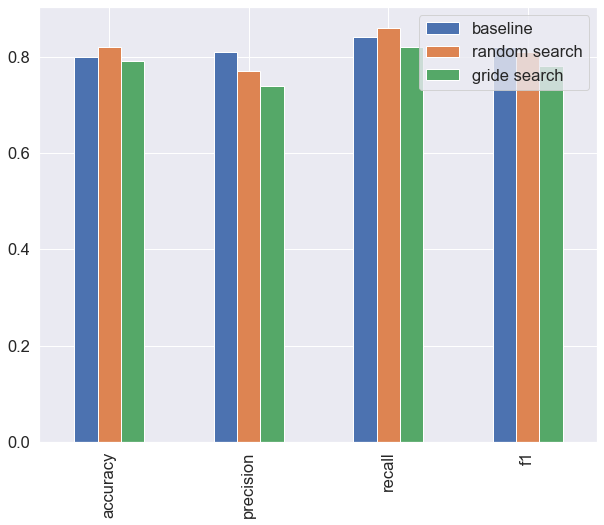

In [148]:
compare_matrics = pd.DataFrame({'baseline':baseline_metrics,
                               'random search':rs_metrics,
                               'gride search':gs_metrics})
compare_matrics.plot.bar(figsize=(10,8));

## 6.Saving and loading trained machine learning models
Two ways save and load learning models:
1. With Python's `pickle` module
2. With the `joblib` modul

**Pickle**

In [149]:
import pickle

# Save an extisting model to file

pickle.dump(gs_clf,open("gs_random_forest_model_1.pkl","wb"))

In [151]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl",'rb'))

In [154]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

Acc:78.69%
Precision:74.19%
Recall:0.82
F1 score:0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [155]:
from joblib import dump,load
# save model to file

dump(gs_clf,filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [157]:
# Import a saved joblib model

loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [161]:
# Make and evaluate joblib predictions

joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Acc:78.69%
Precision:74.19%
Recall:0.82
F1 score:0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7.Putting it all together!


In [162]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")

In [163]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [166]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [184]:
# Getting data ready

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with labels
data = pd.read_csv("./data/car-sales-extended-missing-data.csv")
data.dropna(subset=['Price'],inplace=True)

# Define different deatures and transformer pipline
categorical_features =['Make','Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('onhot',OneHotEncoder(handle_unknown="ignore"))])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value=4))
])

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean'))
])


# Setup preprocessing steps(fill missing values, then convert to numbers)

preprocessor = ColumnTransformer(
                transformers = [
                 ('cat',categorical_transformer,categorical_features),
                 ('door',door_transformer,door_feature),
                ('num',numeric_transformer,numeric_feature)
                ])

# creating a preprocessing and modelling pipline
model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor())
    
])

# Split data

X = data.drop('Price',axis=1)
y = data['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSesrchCV` with our `Pipeline`

In [187]:
# Use GridSearchCV with our regression Pipeline

pipe_gride = {
    "preprocessor__num__imputer__strategy":['mean','median'],
    "model__n_estimators":[100,200],
    "model__max_depth":[None,5],
    "model__max_features":['auto'],
    "model__min_samples_split":[2,4]
}

gs_model = GridSearchCV(model,pipe_gride,cv=5,verbose=2)
gs_model.fit(X_train,y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=200, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=200, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=200, preprocessor__num__imputer__strategy

In [189]:
gs_model.score(X_test,y_test)

0.33628442157331695

In [190]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'auto',
 'model__min_samples_split': 4,
 'model__n_estimators': 100,
 'preprocessor__num__imputer__strategy': 'mean'}